#### **Phase I**

#### 1. Problem & Target

* The problem is to predict metal or rock objects from sonar return data.
* Each pattern is a set of 60 numbers in the range 0.0 to 1.0.
* Each number represents the energy within a particular frequency band, integrated over a certain period of time.
* The label associated with each record contains the letter R if the object is a rock and M if it is a mine (metal cylinder).
* The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

#### 2. dataset

In [1]:
## load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from my_template import tot_exec_time, added_section_separate_line, str_column_to_float
from my_template import describe_skew_unvariate_distribution, describe_class_distribution
from my_template import detect_column_only_single_value, detect_column_very_few_value, detect_have_null_value, detect_outlier_over3std, detect_outlier_quartile
from my_template import visualize_features_hist, visualize_density_plot, visualize_box_whisker_plot, visualize_correlation_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

In [2]:
## load dataset
filename = './dataset/sonar.all-data.csv'
df = pd.read_csv(filename, header=None)
df.columns = ['col_' + str(col) for col in df.columns]
df.rename(columns={'col_60':'target'}, inplace=True)
print(df.head())

    col_0   col_1   col_2   col_3   col_4   col_5   col_6   col_7   col_8  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

    col_9  ...  col_51  col_52  col_53  col_54  col_55  col_56  col_57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

   col_58  col_59  target  
0  0.0090  0.0032       R  
1  0.0052  0.0044       R  
2  0.009

In [39]:
## summarize data
print(f"dataset head: \n{df.head()}")
added_section_separate_line()
print(f"dataset shape: {df.shape}")
added_section_separate_line()
pd.set_option('precision', 1)
print(f"dataset description: \n{df.describe()}")
added_section_separate_line()
print("feaures skew:")
describe_skew_unvariate_distribution(df, df.columns)
added_section_separate_line()
print("target class distribution:")
describe_class_distribution(df, 'target')

dataset head: 
     col_0    col_1    col_2    col_3    col_4    col_5  col_6  col_7  \
0  2.0e-02  3.7e-02  4.3e-02  2.1e-02  9.5e-02  9.9e-02    0.2    0.2   
1  4.5e-02  5.2e-02  8.4e-02  6.9e-02  1.2e-01  2.6e-01    0.2    0.3   
2  2.6e-02  5.8e-02  1.1e-01  1.1e-01  9.7e-02  2.3e-01    0.2    0.4   
3  1.0e-02  1.7e-02  6.2e-02  2.1e-02  2.1e-02  3.7e-02    0.1    0.1   
4  7.6e-02  6.7e-02  4.8e-02  3.9e-02  5.9e-02  6.5e-02    0.1    0.2   

     col_8  col_9  ...   col_51   col_52   col_53   col_54   col_55   col_56  \
0  3.1e-01    0.2  ...  2.7e-03  6.5e-03  1.6e-02  7.2e-03  1.7e-02  1.8e-02   
1  3.3e-01    0.3  ...  8.4e-03  8.9e-03  4.8e-03  9.4e-03  1.9e-02  1.4e-02   
2  5.6e-01    0.6  ...  2.3e-02  1.7e-02  9.5e-03  1.8e-02  2.4e-02  3.2e-02   
3  6.0e-02    0.1  ...  1.2e-02  3.6e-03  1.5e-02  8.5e-03  7.3e-03  5.0e-03   
4  3.6e-01    0.4  ...  3.1e-03  5.4e-03  1.1e-02  1.1e-02  1.5e-03  7.2e-03   

    col_57   col_58   col_59  target  
0  8.4e-03  9.0e-03  3.2e-

target
M    111
R     97
dtype: int64

* 觀察dataset
    * 屬於classification problem，且為二元分類
    * 共60個features，皆為numeric
    * 共208筆資料量

Histogram of features:


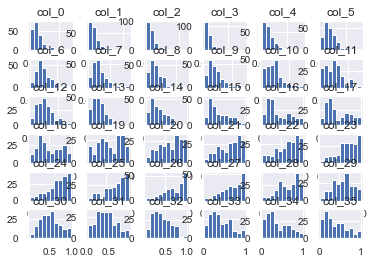

Histogram of features:


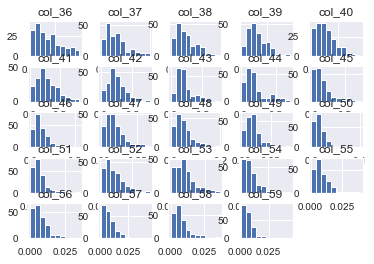

------------------------------
Density Plots of features:


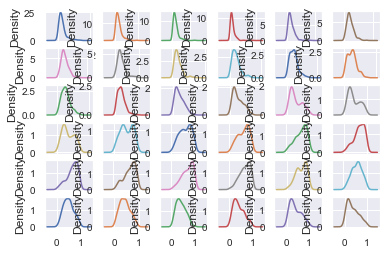

Density Plots of features:


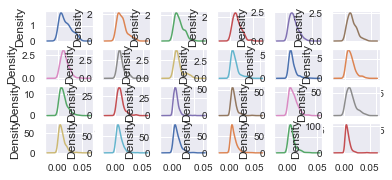

------------------------------
Box-whisker Plots of features:


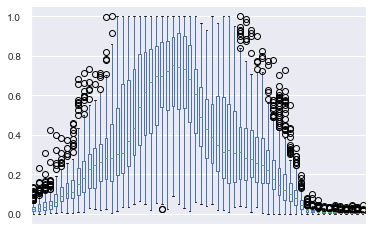

------------------------------
Correlation matrix of features:


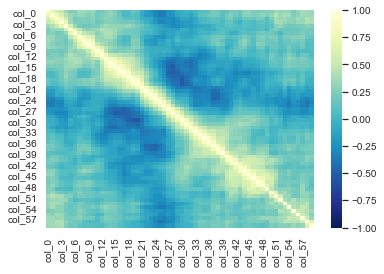

In [4]:
## data visualization
sns.set_theme(style="darkgrid")
plt.rc('ytick', labelsize=10)
plt.rc('xtick', labelsize=10)
visualize_features_hist(df, df.columns[:36])
visualize_features_hist(df, df.columns[36:])
added_section_separate_line()
visualize_density_plot(df, df.columns[:36], layout=(6,6), legend=False)
visualize_density_plot(df, df.columns[36:], layout=(6,6), legend=False)
added_section_separate_line()
visualize_box_whisker_plot(df, df.columns, subplots=False, legend=True)
added_section_separate_line()
visualize_correlation_matrix(df, df.columns, annot=False)

* 小結：
    * 觀察histogram與density plot，有許多features呈現skew的現象
    * 觀察box-whisker plot，部分features應含outliers
    * 觀察correlation plot，features之間應有存在若干正相關&負相關

#### **Phase II** (Round 0)

#### data preprocessing

In [41]:
## data cleaning - data detection to remove
detect_column_only_single_value(df)
added_section_separate_line()
detect_column_very_few_value(df)
added_section_separate_line()
detect_have_null_value(df)
added_section_separate_line()
for col in df.columns[:-1]:
    print(f"Feature ({col}):", end=" ")
    detect_outlier_over3std(df, col)
added_section_separate_line()
for col in df.columns[:-1]:
    print(f"Feature ({col}):", end=" ")
    detect_outlier_quartile(df, col)

Record columns to delete (only single value): []
------------------------------
Record columns to delete (very few value): [60]
------------------------------
There is no null value in dataframe.
------------------------------
Feature (col_0): Identified outliers: 6, Non-outlier observation: 208
Feature (col_1): Identified outliers: 3, Non-outlier observation: 208
Feature (col_2): Identified outliers: 4, Non-outlier observation: 208
Feature (col_3): Identified outliers: 2, Non-outlier observation: 208
Feature (col_4): Identified outliers: 4, Non-outlier observation: 208
Feature (col_5): Identified outliers: 2, Non-outlier observation: 208
Feature (col_6): Identified outliers: 2, Non-outlier observation: 208
Feature (col_7): Identified outliers: 5, Non-outlier observation: 208
Feature (col_8): Identified outliers: 6, Non-outlier observation: 208
Feature (col_9): Identified outliers: 3, Non-outlier observation: 208
Feature (col_10): Identified outliers: 3, Non-outlier observation: 208
Fe

* 小結：
    * 此dataset沒有null value，但有部分features有outlier的存在，後續可考慮進行優化

#### model & validation

In [42]:
seed = 87
scoring = 'accuracy'
num_folds = 10

In [43]:
data = df.values
X = data[:, :-1].astype(float)
y = data[:, -1]
validation_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [44]:
# build model
models = dict()
models['LR'] = Pipeline(steps=[('m', LogisticRegression(solver='liblinear'))])
models['LDA'] = Pipeline(steps=[('m', LinearDiscriminantAnalysis())])
models['KNN'] = Pipeline(steps=[('m', KNeighborsClassifier())])
models['CART'] = Pipeline(steps=[('m', DecisionTreeClassifier())])
models['RF'] = Pipeline(steps=[('m', RandomForestClassifier())])
models['GBM'] = Pipeline(steps=[('m', GradientBoostingClassifier())])
models['NB'] = Pipeline(steps=[('m', GaussianNB())])
models['SVM'] = Pipeline(steps=[('m', SVC(gamma='auto'))])
# train model
results, names = list(), list()
for name, model in models.items():
    cv = KFold(n_splits=10, random_state=seed, shuffle=True)
    scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
    results.append(scores)
    names.append(name)
    print(f">{name} {np.mean(scores):.3f} ({np.std(scores):.3f})")

>LR 0.771 (0.081)
>LDA 0.722 (0.076)
>KNN 0.766 (0.082)
>CART 0.729 (0.125)
>RF 0.831 (0.096)
>GBM 0.825 (0.061)
>NB 0.681 (0.080)
>SVM 0.556 (0.144)


#### **Phase III**

#### prediction

In [45]:
## 使用base-model進行預測
print("# Baseline model:")
output_values = df['target'].values.tolist()
prediction = max(set(output_values), key=output_values.count)   # 找出比例最大的分類，直接作為所有驗證集的baseline預測結果
print(f"The most common value in target: {prediction}; and ratio of this feature in all dataset: {100*len(df[df['target']==prediction])/len(df):.2f}%")

# Baseline model:
The most common value in target: M; and ratio of this feature in all dataset: 53.37%


In [46]:
# prediction
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"> accuracy score: {100*accuracy_score(y_test, y_pred):.3f}%")
print(f"> confusion matric: \n{confusion_matrix(y_test, y_pred)}")
print(f"> classification report: \n{classification_report(y_test, y_pred)}")

> accuracy score: 76.190%
> confusion matric: 
[[18  4]
 [ 6 14]]
> classification report: 
              precision    recall  f1-score   support

           M       0.75      0.82      0.78        22
           R       0.78      0.70      0.74        20

    accuracy                           0.76        42
   macro avg       0.76      0.76      0.76        42
weighted avg       0.76      0.76      0.76        42



In [47]:
# prediction
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"> accuracy score: {100*accuracy_score(y_test, y_pred):.3f}%")
print(f"> confusion matric: \n{confusion_matrix(y_test, y_pred)}")
print(f"> classification report: \n{classification_report(y_test, y_pred)}")

> accuracy score: 71.429%
> confusion matric: 
[[18  4]
 [ 8 12]]
> classification report: 
              precision    recall  f1-score   support

           M       0.69      0.82      0.75        22
           R       0.75      0.60      0.67        20

    accuracy                           0.71        42
   macro avg       0.72      0.71      0.71        42
weighted avg       0.72      0.71      0.71        42



* 小結：
    * 在對dataset未進行任何處理的情況下，以10-Fold cross validation進行訓練，其中以RandomForestClassifier & GradientBoostingClassifier訓練accuracy最高
    * 但進行prediction時所得accuracy皆偏低，且對於target='R'的recall偏低

### Experimant 1: Data transform to Gaussian distribution

#### **Phase II**

#### model & validationm

In [48]:
seed = 87
scoring = 'accuracy'
num_folds = 10

In [49]:
data = df.values
X = data[:, :-1].astype(float)
y = data[:, -1]
validation_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [51]:
# build model
models = dict()
models['LR'] = Pipeline(steps=[('Scaler', StandardScaler()), ('m', LogisticRegression(solver='liblinear'))])
models['LDA'] = Pipeline(steps=[('Scaler', StandardScaler()), ('m', LinearDiscriminantAnalysis())])
models['KNN'] = Pipeline(steps=[('Scaler', StandardScaler()), ('m', KNeighborsClassifier())])
models['CART'] = Pipeline(steps=[('Scaler', StandardScaler()), ('m', DecisionTreeClassifier())])
models['RF'] = Pipeline(steps=[('Scaler', StandardScaler()), ('m', RandomForestClassifier())])
models['GBM'] = Pipeline(steps=[('Scaler', StandardScaler()), ('m', GradientBoostingClassifier())])
models['NB'] = Pipeline(steps=[('Scaler', StandardScaler()), ('m', GaussianNB())])
models['SVM'] = Pipeline(steps=[('Scaler', StandardScaler()), ('m', SVC(gamma='auto'))])
# train model
results, names = list(), list()
for name, model in models.items():
    cv = KFold(n_splits=10, random_state=seed, shuffle=True)
    scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
    results.append(scores)
    names.append(name)
    print(f">{name} {np.mean(scores):.3f} ({np.std(scores):.3f})")

>LR 0.771 (0.092)
>LDA 0.722 (0.076)
>KNN 0.814 (0.065)
>CART 0.718 (0.112)
>RF 0.854 (0.094)
>GBM 0.825 (0.057)
>NB 0.681 (0.080)
>SVM 0.850 (0.039)


#### **Phase III**

#### prediction

In [56]:
# prediction
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
rescaledTestX = scaler.transform(X_test)
model = RandomForestClassifier()
model.fit(rescaledX, y_train)
y_pred = model.predict(rescaledTestX)
print(f"> accuracy score: {100*accuracy_score(y_test, y_pred):.3f}%")
print(f"> confusion matric: \n{confusion_matrix(y_test, y_pred)}")
print(f"> classification report: \n{classification_report(y_test, y_pred)}")

> accuracy score: 78.571%
> confusion matric: 
[[18  4]
 [ 5 15]]
> classification report: 
              precision    recall  f1-score   support

           M       0.78      0.82      0.80        22
           R       0.79      0.75      0.77        20

    accuracy                           0.79        42
   macro avg       0.79      0.78      0.78        42
weighted avg       0.79      0.79      0.79        42



In [57]:
# prediction
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
rescaledTestX = scaler.transform(X_test)
model = GradientBoostingClassifier()
model.fit(rescaledX, y_train)
y_pred = model.predict(rescaledTestX)
print(f"> accuracy score: {100*accuracy_score(y_test, y_pred):.3f}%")
print(f"> confusion matric: \n{confusion_matrix(y_test, y_pred)}")
print(f"> classification report: \n{classification_report(y_test, y_pred)}")

> accuracy score: 69.048%
> confusion matric: 
[[18  4]
 [ 9 11]]
> classification report: 
              precision    recall  f1-score   support

           M       0.67      0.82      0.73        22
           R       0.73      0.55      0.63        20

    accuracy                           0.69        42
   macro avg       0.70      0.68      0.68        42
weighted avg       0.70      0.69      0.68        42



In [58]:
# prediction
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
rescaledTestX = scaler.transform(X_test)
model = KNeighborsClassifier()
model.fit(rescaledX, y_train)
y_pred = model.predict(rescaledTestX)
print(f"> accuracy score: {100*accuracy_score(y_test, y_pred):.3f}%")
print(f"> confusion matric: \n{confusion_matrix(y_test, y_pred)}")
print(f"> classification report: \n{classification_report(y_test, y_pred)}")

> accuracy score: 73.810%
> confusion matric: 
[[21  1]
 [10 10]]
> classification report: 
              precision    recall  f1-score   support

           M       0.68      0.95      0.79        22
           R       0.91      0.50      0.65        20

    accuracy                           0.74        42
   macro avg       0.79      0.73      0.72        42
weighted avg       0.79      0.74      0.72        42



* 小結：
    * 通過Standardize後，部分algorithm提升accuracy，其中以RandomForestClassifier在train&prediction的效果有提升，但其target='R'的Recall依舊偏低，後續需優化

### Experiment 2: Outlier treatment

In [12]:
from sklearn.neighbors import LocalOutlierFactor
from my_template import detect_outlier_over3std, remove_outlier_over3std

#### **Phase II**

#### data preprocessing

In [13]:
# remove outliers
df_outlier = df.copy(deep=True)
for col in df_outlier.columns[:-1]:
    df_outlier = remove_outlier_over3std(df_outlier, col)

#### model & validation

In [15]:
seed = 87
scoring = "accuracy"

In [16]:
data_outlier = df_outlier.values
X = data_outlier[:, :-1].astype(float)
y = data_outlier[:, -1]
validation_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [17]:
# build model
models = dict()
models['LR'] = Pipeline(steps=[('Scaler', StandardScaler()), ('m', LogisticRegression(solver='liblinear'))])
models['LDA'] = Pipeline(steps=[('Scaler', StandardScaler()), ('m', LinearDiscriminantAnalysis())])
models['KNN'] = Pipeline(steps=[('Scaler', StandardScaler()), ('m', KNeighborsClassifier())])
models['CART'] = Pipeline(steps=[('Scaler', StandardScaler()), ('m', DecisionTreeClassifier())])
models['RF'] = Pipeline(steps=[('Scaler', StandardScaler()), ('m', RandomForestClassifier())])
models['GBM'] = Pipeline(steps=[('Scaler', StandardScaler()), ('m', GradientBoostingClassifier())])
models['NB'] = Pipeline(steps=[('Scaler', StandardScaler()), ('m', GaussianNB())])
models['SVM'] = Pipeline(steps=[('Scaler', StandardScaler()), ('m', SVC(gamma='auto'))])
# train model
results, names = list(), list()
for name, model in models.items():
    cv = KFold(n_splits=10, random_state=seed, shuffle=True)
    scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
    results.append(scores)
    names.append(name)
    print(f">{name} {np.mean(scores):.3f} ({np.std(scores):.3f})")

>LR 0.825 (0.103)
>LDA 0.817 (0.146)
>KNN 0.731 (0.121)
>CART 0.735 (0.147)
>RF 0.815 (0.071)
>GBM 0.835 (0.078)
>NB 0.778 (0.082)
>SVM 0.871 (0.092)


#### **Phase II**

#### prediction

In [18]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
rescaledTestX = scaler.transform(X_test)
model = SVC(gamma='auto')
model.fit(rescaledX, y_train)
y_pred = model.predict(rescaledTestX)
print(f"> accuracy score: {100*accuracy_score(y_test, y_pred):.3f}%")
print(f"> confusion matric: \n{confusion_matrix(y_test, y_pred)}")
print(f"> classification report: \n{classification_report(y_test, y_pred)}")

> accuracy score: 89.286%
> confusion matric: 
[[12  1]
 [ 2 13]]
> classification report: 
              precision    recall  f1-score   support

           M       0.86      0.92      0.89        13
           R       0.93      0.87      0.90        15

    accuracy                           0.89        28
   macro avg       0.89      0.89      0.89        28
weighted avg       0.90      0.89      0.89        28



In [19]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
rescaledTestX = scaler.transform(X_test)
model = LogisticRegression(solver='liblinear')
model.fit(rescaledX, y_train)
y_pred = model.predict(rescaledTestX)
print(f"> accuracy score: {100*accuracy_score(y_test, y_pred):.3f}%")
print(f"> confusion matric: \n{confusion_matrix(y_test, y_pred)}")
print(f"> classification report: \n{classification_report(y_test, y_pred)}")

> accuracy score: 85.714%
> confusion matric: 
[[12  1]
 [ 3 12]]
> classification report: 
              precision    recall  f1-score   support

           M       0.80      0.92      0.86        13
           R       0.92      0.80      0.86        15

    accuracy                           0.86        28
   macro avg       0.86      0.86      0.86        28
weighted avg       0.87      0.86      0.86        28



* 小結：
    * 使用Stadardize Scaling + Outlier removing有效提升accuracy，其中SVM Classifier於train accuracy為87.1%，於prediction accuracy為89.3%

### Experiment 3 : Model hyperparameter Tuning

#### **Phase II**

#### data preprocessing

In [20]:
# remove outliers
df_outlier = df.copy(deep=True)
for col in df_outlier.columns[:-1]:
    df_outlier = remove_outlier_over3std(df_outlier, col)

#### model & validation

In [60]:
seed = 87
scoring = 'accuracy'

In [21]:
data_outlier = df_outlier.values
X = data_outlier[:, :-1].astype(float)
y = data_outlier[:, -1]
validation_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [22]:
# SVM Classifier
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = Pipeline(steps=[('m', SVC(gamma='auto'))])
cv = KFold(n_splits=10, random_state=seed, shuffle=True)
scores = cross_val_score(model, rescaledX, y_train, scoring=scoring, cv=cv, n_jobs=-1)
print(f"Accuracy(origin): {np.mean(scores):.3f} ({np.std(scores):.3f})")
added_section_separate_line()
params = [{'C': [0.1, 1, 1.5, 2, 2.2, 2.5, 2.7, 3, 5]}]
model = SVC()
cv = KFold(n_splits=10, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=params, scoring=scoring, cv=cv)
grid.fit(X_train, y_train)
print(f"Tuned hpyerparameters :(best parameters) {grid.best_params_}")
print(f"Accuracy : {grid.best_score_:.3f}")

Accuracy(origin): 0.871 (0.092)
------------------------------
Tuned hpyerparameters :(best parameters) {'C': 5}
Accuracy : 0.824


#### **Phase III**

#### prediction

In [23]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
rescaledTestX = scaler.transform(X_test)
model = SVC(C=5)
model.fit(rescaledX, y_train)
y_pred = model.predict(rescaledTestX)
print(f"> accuracy score: {100*accuracy_score(y_test, y_pred):.3f}%")
print(f"> confusion matric: \n{confusion_matrix(y_test, y_pred)}")
print(f"> classification report: \n{classification_report(y_test, y_pred)}")

> accuracy score: 89.286%
> confusion matric: 
[[12  1]
 [ 2 13]]
> classification report: 
              precision    recall  f1-score   support

           M       0.86      0.92      0.89        13
           R       0.93      0.87      0.90        15

    accuracy                           0.89        28
   macro avg       0.89      0.89      0.89        28
weighted avg       0.90      0.89      0.89        28



* 小結：
    * 使用Stadardize Scaling + Outlier removing + model tuning相較於Stadardize Scaling + Outlier removing的accuracy提升有限

* 結論：
    * 此dataset作為二元分類問題，其baseline model accuracy為53.37%
    * 通過分類模型(如RandomForestClassifier)，可將prediction accuacy提升至76.19%
    * 進行accuracy優化，最終進行Standardize rescaling (Gaussian distribution) + Outlier treatment，訓練出SVM Classifier，可將prediction accuracy提升至89.3%
    * 專門針對SVM Classifier進行hyperparameter，並無進一步提升accuracy